<a href="https://colab.research.google.com/github/bwilli2086/data_analytics/blob/main/Python/group_COVID19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. environment set up

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

2.data collection

In [ ]:
#data without county
df = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv')
df.columns
df

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0
...,...,...,...,...,...
17664,2021-01-17,Virginia,51,439305,5729
17665,2021-01-17,Washington,53,293296,3971
17666,2021-01-17,West Virginia,54,108821,1776
17667,2021-01-17,Wisconsin,55,568166,5907


In [ ]:
#data with county
df1=pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv')
df1.columns
df1

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0
...,...,...,...,...,...,...
939983,2021-01-17,Sweetwater,Wyoming,56037.0,3290,26.0
939984,2021-01-17,Teton,Wyoming,56039.0,2685,4.0
939985,2021-01-17,Uinta,Wyoming,56041.0,1817,9.0
939986,2021-01-17,Washakie,Wyoming,56043.0,842,23.0


***3.State of New York***

In [ ]:
#Insight of the data for New York State
ny_state=df.loc[df['state']=='New York']
ny_state.describe()

,fips,cases,deaths
count,323.0,3.230000e+02,323.000000
mean,36.0,4.498481e+05,27816.811146
std,0.0,2.542205e+05,10960.953599
min,36.0,1.000000e+00,0.000000
25%,36.0,3.602740e+05,28601.500000
50%,36.0,4.255680e+05,32399.000000
75%,36.0,5.066645e+05,33117.500000
max,36.0,1.242818e+06,40570.000000


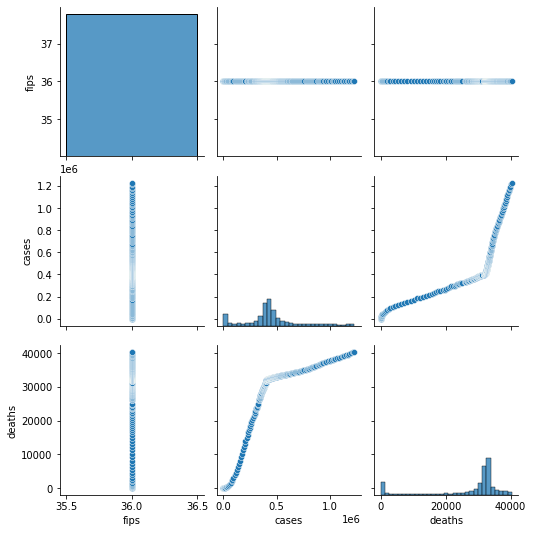

In [ ]:
sns.pairplot(ny_state)


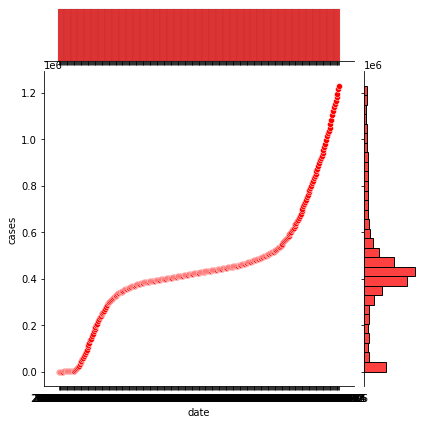

In [ ]:
sns.jointplot(x='date', y='cases', data=ny_state, color='red')

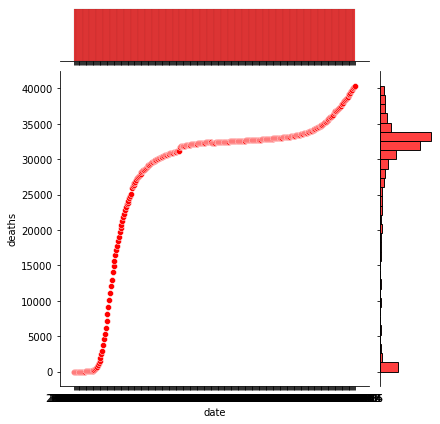

In [ ]:
sns.jointplot(x='date', y='deaths', data=ny_state, color='red')

In [ ]:
ny_date=ny_state
ny_date=ny_date[(ny_date['date']<='2021-01-16') & (ny_date['date']>='2020-07-01')]
ny_date.describe()

,fips,cases,deaths
count,200.0,2.000000e+02,200.000000
mean,36.0,5.737844e+05,33692.775000
std,0.0,2.120281e+05,1994.660809
min,36.0,3.987700e+05,31791.000000
25%,36.0,4.323732e+05,32451.000000
50%,36.0,4.756255e+05,32863.000000
75%,36.0,6.346550e+05,34015.250000
max,36.0,1.229124e+06,40376.000000


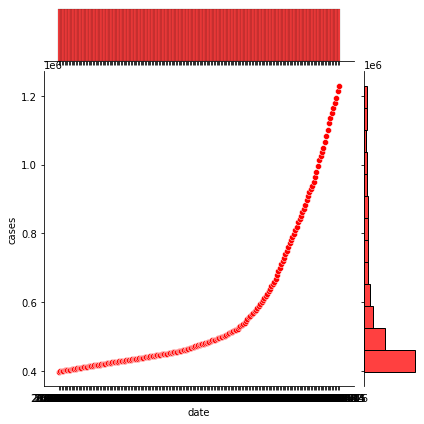

In [ ]:
sns.jointplot(x='date', y='cases', data=ny_date, color='red')

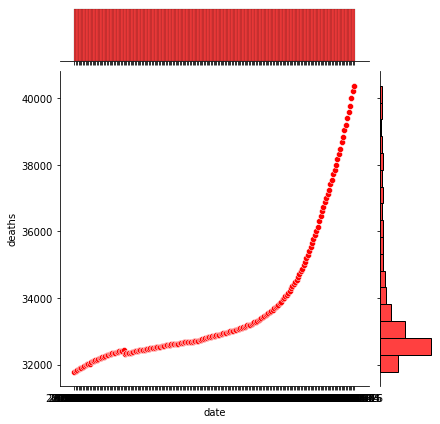

In [ ]:
sns.jointplot(x='date', y='deaths', data=ny_date, color='red')

In [ ]:
ny_date0=ny_state
ny_date0=ny_date0[(ny_date0['date']<='2021-01-16') & (ny_date0['date']>='2020-12-15')]
infection=ny_date0['cases'] - ny_date0['cases'].shift()
rate=0
d=ny_date0.date.values

for rate in range(len(ny_date0)):
    total=infection.values[rate]
    print('On date:',d[rate],'the were:',total,'new infections')

As of January 16th New York State had a total of 1,229,124 COVID 19 cases and 40,376 deaths. The highest count of cases are in New York City with 524,231 and the lowest being Hamilton County with only 145. Looking at the pair plot graph we see that there is a collation between the increase in cases and death. Initially, there was a high relation between the increase in cases and the increase in deaths, but over time, that relationship decreased, where a 10% increase in cases didn't mean a 10% increase in death,this can be caused by the advancements in treating the virus. 

We examine the state of New York from July 1st, 2020 to January 16th 2021. Looking at the graph of the cases by date, we see a high initial increase in cases and deaths, we see that the case of infection in New York increased from 398k to 1.229 million cases. This shows a 208% increase in cases. At the same time we see that deaths increased from 31,791 to 40,376. This shows a 27% increase in deaths. This again validates my first point that there is a collation between the cases infection rate and death rate, but they are not related directly.


***4.counties in nys***

In [ ]:
#data for counties in nys
nyc=df1.loc[df1['state']=='New York']
nyc
nyc.isnull()#check for missing values
nyc.isnull().sum()
nyc1=nyc.dropna(axis=1)#drop columns with missing values
nyc1


,date,county,state,cases,deaths
416,2020-03-01,New York City,New York,1,0.0
448,2020-03-02,New York City,New York,1,0.0
482,2020-03-03,New York City,New York,2,0.0
518,2020-03-04,New York City,New York,2,0.0
519,2020-03-04,Westchester,New York,9,0.0
...,...,...,...,...,...
935396,2021-01-16,Washington,New York,1424,21.0
935397,2021-01-16,Wayne,New York,3568,50.0
935398,2021-01-16,Westchester,New York,82932,1780.0
935399,2021-01-16,Wyoming,New York,2075,41.0


In [ ]:
wyoming= nyc1.loc[nyc1['county']== 'Wyoming']
wyoming

,date,county,state,cases,deaths
3564,2020-03-17,Wyoming,New York,1,0.0
4167,2020-03-18,Wyoming,New York,1,0.0
4898,2020-03-19,Wyoming,New York,2,0.0
5749,2020-03-20,Wyoming,New York,2,0.0
6744,2020-03-21,Wyoming,New York,2,0.0
...,...,...,...,...,...
922418,2021-01-12,Wyoming,New York,1887,35.0
925664,2021-01-13,Wyoming,New York,1905,36.0
928909,2021-01-14,Wyoming,New York,1939,40.0
932154,2021-01-15,Wyoming,New York,1987,41.0


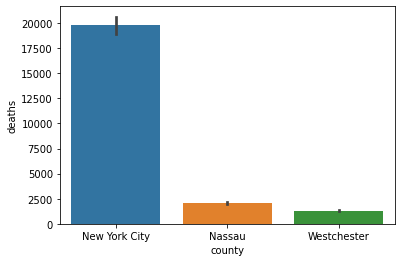

In [ ]:
#dataframes for nyc, washington, and westchester
nycity=nyc1.loc[nyc1['county']=='New York City']
nyn=nyc1.loc[nyc1['county']=='Nassau']
nyw=nyc1.loc[nyc1['county']=='Westchester']
#combine several dataframes
frames=[nycity,nyn,nyw]
result=pd.concat(frames)
result
#visualization
sns.barplot(x='county',y='deaths',data=result)

of three counties, new york city has the most deaths.

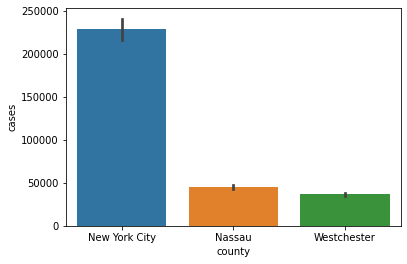

In [ ]:
sns.barplot(x='county',y='cases',data=result)

of three counties, new york has the most cases.

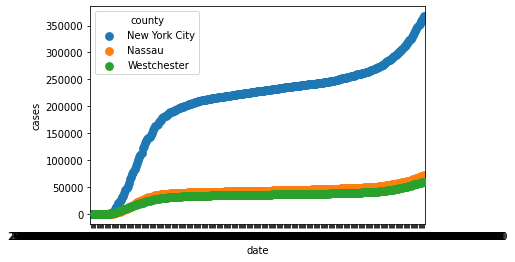

In [ ]:
#change data type of date column
result['date']=pd.to_datetime(result['date'])
#new date frame with data range
start='2020-01-15'
end='2020-12-15'
input=(result['date']>start) & (result['date']<=end)
result1=result.loc[input]
result1
sns.pointplot(x='date',y='cases',data=result1,hue='county')

cases increase over time for three counties

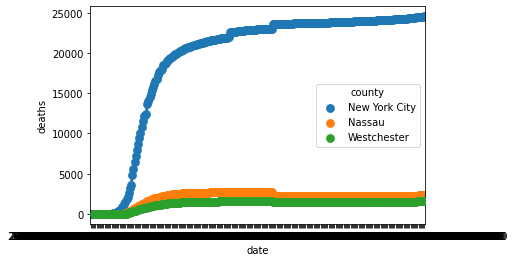

In [ ]:
sns.pointplot(x='date',y='deaths',data=result1,hue='county')

deaths increase over time

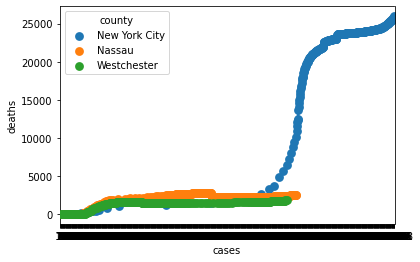

In [ ]:
sns.pointplot(x='cases',y='deaths',data=result,hue='county')

there is a relationship between cases and deaths

***5.compare 5 states***

In [ ]:
#combined data of all five states
ny=df.loc[df['state']=='New York']
fl=df.loc[df['state']== 'Florida']
cal=df.loc[df['state']== 'California']
arz=df.loc[df['state']== 'Arizona']
txs= df.loc[df['state']== 'Texas']
frame= [ny,fl,cal,arz,txs]
results=pd.concat(frame)
results

,date,state,fips,cases,deaths
246,2020-03-01,New York,36,1,0
261,2020-03-02,New York,36,1,0
276,2020-03-03,New York,36,2,0
293,2020-03-04,New York,36,11,0
313,2020-03-05,New York,36,22,0
...,...,...,...,...,...
17385,2021-01-12,Texas,48,2018685,31017
17440,2021-01-13,Texas,48,2042009,31396
17495,2021-01-14,Texas,48,2071932,31819
17550,2021-01-15,Texas,48,2096526,32212


In [ ]:
#filter the dates
results1= results
results1 = results1[(results1['date']<='2021-01-16') & (results1['date']>='2020-07-01')]

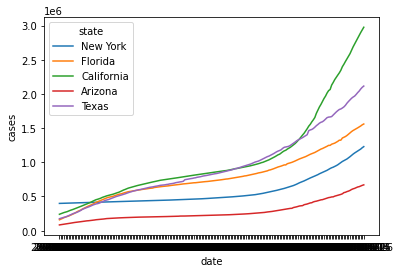

In [ ]:
sns.lineplot(x='date', y='cases', data=results1, hue='state')

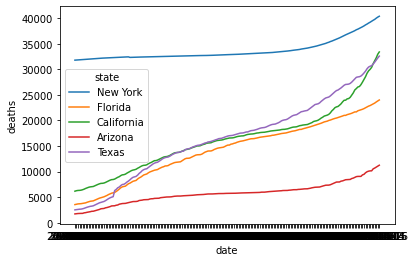

In [ ]:
sns.lineplot(x='date',y='deaths',data=results1,hue='state')

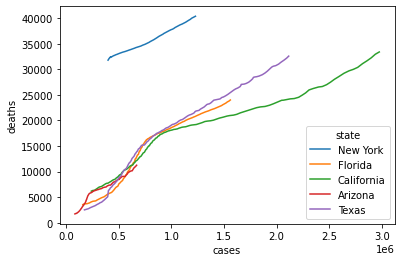

In [ ]:
sns.lineplot(x='cases',y='deaths',data=results1,hue='state')

For this task, I compared the Covid-19 cases and deaths of New York, Florida, California, Arizona and Texas between Juy 1, 2020 and January 16, 2021. 

Cases: In July, New York had the highest number of Covid-19 cases of the five and by January, it had the second lowest,with Arizona having the lowest and California the highest.The number of cases continued to increase in those 6 months, and rose more sharply towards the end of the year. 

Deaths: The number of deaths also increased between July and January, and climbed faster towards the end of the year. New York continued to have much higher number of deaths than the other four states, followed by California, Texas, Florida, and Arizona having the lowest amount of deaths, and by a significant amount. 
The sharp increase for both cases and deaths towards the end of the year could have been caused by more people traveling and gathering during the holidays. 

Deaths per case: As the number of cases increased, so did the number of deaths, with New York having the highest rate, followed by California, Texas, Florida, and Arizona. Within the six months, the rate of deaths highest in the beginning, then decreased until starting to rise again by the end of the year.